EDA

In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# si uso
velocidad_provincia= pd.read_csv('Data/velocidad_provincia.csv')
totales_accesos_tecnologia= pd.read_csv('Data/totales_accesos_tecnologia.csv')
accesos_tecnologia_provincia= pd.read_csv('Data/accesos_tecnologia_provincia.csv')
p_totales_provincia= pd.read_csv('Data/p_totales_provincia.csv')
ingresos= pd.read_csv('Data/ingresos.csv')

# Analisis Hoja **velocidad_provincia** <p>
Distribución porcentual de la velocidad de conexión a internet por provincia.

## Valores nulos, valor 0, duplicados, outliers

In [ ]:
velocidad_provincia.head(2)

In [5]:
velocidad_provincia.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [95]:
# valores duplicados
velocidad_provincia.duplicated().sum()

0

## Ranking de Provincias por Velocidad Media
- Se desea obtener un ranking de las provincias en base a la velocidad promedio anual
- Objetivo: obtener provincias significativas para posteriores analisís en base a velocidad Mpbs
- Uso de gráfico de barras horizontales de velocidad promedio por provincia y agruopación por cuartiles para asignar grupos por categoría.

In [6]:
# Se agrupa por provincia y se realiza la media anual del Mbps
ranking_velocidad_provincia = velocidad_provincia.groupby('Provincia')['Mbps (Media de bajada)'].mean().sort_values(ascending=False).reset_index()
ranking_velocidad_provincia.rename( {'Mbps (Media de bajada)':'Velocidad promedio (Mbps)'}, axis=1, inplace=True)

ranking_velocidad_provincia.head(2)

,Provincia,Velocidad promedio (Mbps)
0,Capital Federal,63.331718
1,Buenos Aires,44.001793


Agrupación por cuartiles del ranking

In [7]:
ranking_velocidad_provincia['Categoría (Cuartil)'] = pd.qcut(
    ranking_velocidad_provincia['Velocidad promedio (Mbps)'], 
    q=4,  # Número de grupos (cuartiles)
    labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']
)

# Mostrar el dataframe con la nueva columna
ranking_velocidad_provincia

,Provincia,Velocidad promedio (Mbps),Categoría (Cuartil)
0,Capital Federal,63.331718,Alto
1,Buenos Aires,44.001793,Alto
2,Córdoba,35.077366,Alto
3,Chaco,32.950653,Alto
4,Tucumán,32.511764,Alto
5,Neuquén,31.061871,Alto
6,Catamarca,29.836084,Medio-Alto
7,Corrientes,29.335323,Medio-Alto
8,Santa Fe,29.291080,Medio-Alto
9,San Luis,28.983817,Medio-Alto


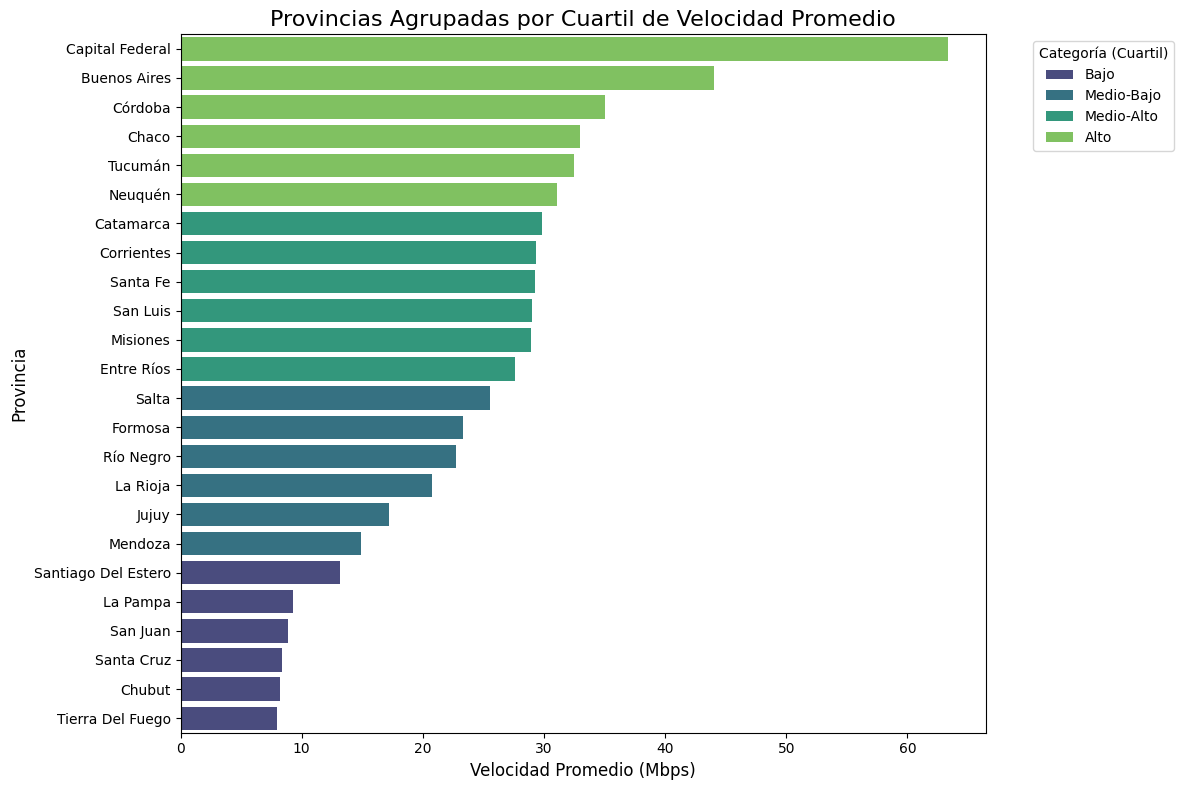

In [8]:
# Gráfico de barras coloreado por cuartil
plt.figure(figsize=(12, 8))
sns.barplot(
    data=ranking_velocidad_provincia,
    x='Velocidad promedio (Mbps)',
    y='Provincia',
    hue='Categoría (Cuartil)',  # Colorear según el grupo de cuartil
    dodge=False,
    palette='viridis'
)

# Mejorar la legibilidad del gráfico
plt.title('Provincias Agrupadas por Cuartil de Velocidad Promedio', fontsize=16)
plt.xlabel('Velocidad Promedio (Mbps)', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.legend(title='Categoría (Cuartil)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Conclusión**

1. Provincias Líderes <p>
Las provincias con la categoría "Alto" son las que consistentemente lideran en velocidad promedio de internet:

    - Capital Federal (63.33 Mbps)
    - Buenos Aires (44.00 Mbps)
    - Chaco (32.95 Mbps)
    - Tucumán (32.51 Mbps)

    Posibles causas:

    *Densidad Poblacional Alta*: Estas regiones concentran la mayor parte de la población, lo que justifica una inversión significativa en infraestructura. <p>
    *Desarrollo Urbano*: Las áreas metropolitanas suelen tener un mejor acceso a servicios tecnológicos.

1. Provincias Rezagadas <p>
En contraste, las provincias con la categoría "Bajo" presentan las velocidades más bajas:

    - Santiago del Estero (13.21 Mbps)
    - La Pampa (9.29 Mbps)
    - San Juan (8.85 Mbps)
    - Santa Cruz (8.41 Mbps)
    - Chubut (8.19 Mbps)
    - Tierra del Fuego (7.99 Mbps)

    Posibles causas:

    *Ubicación Geográfica Remota*: Algunas de estas provincias están en regiones más alejadas o menos accesibles.<p>
    *Menor Densidad Poblacional*: La baja demanda de servicios tecnológicos puede limitar la inversión en infraestructura.<p>
    *Desafíos Climáticos y Geográficos*: Especialmente en provincias como Tierra del Fuego o Santa Cruz, donde las condiciones climáticas pueden dificultar el desarrollo.


**Posterior Análisis**
Con el objetivo de obtener un informe representativo y uniforme, se seleccionan 2 provincias de cada Categoría:
- Alto: Capital Federal, Buenos Aires
- Medio-Alto: Catamarca, Santa Fe
- Medio-Bajo: Salta, Mendoza
- Bajo: Santiago del Estero, Tierra del fuego

## Análisis de Tendencias Temporales
- Promedio de Mbps por Provincia a lo largo del tiempo.
- Objetivo: Visualizar la variación de la velocidad promedio en cada provincia con el tiempo, y evaluar las tendencias.
- Uso de gráfico: Línea temporal con Año vs Mbps en el eje y, separado por provincias.

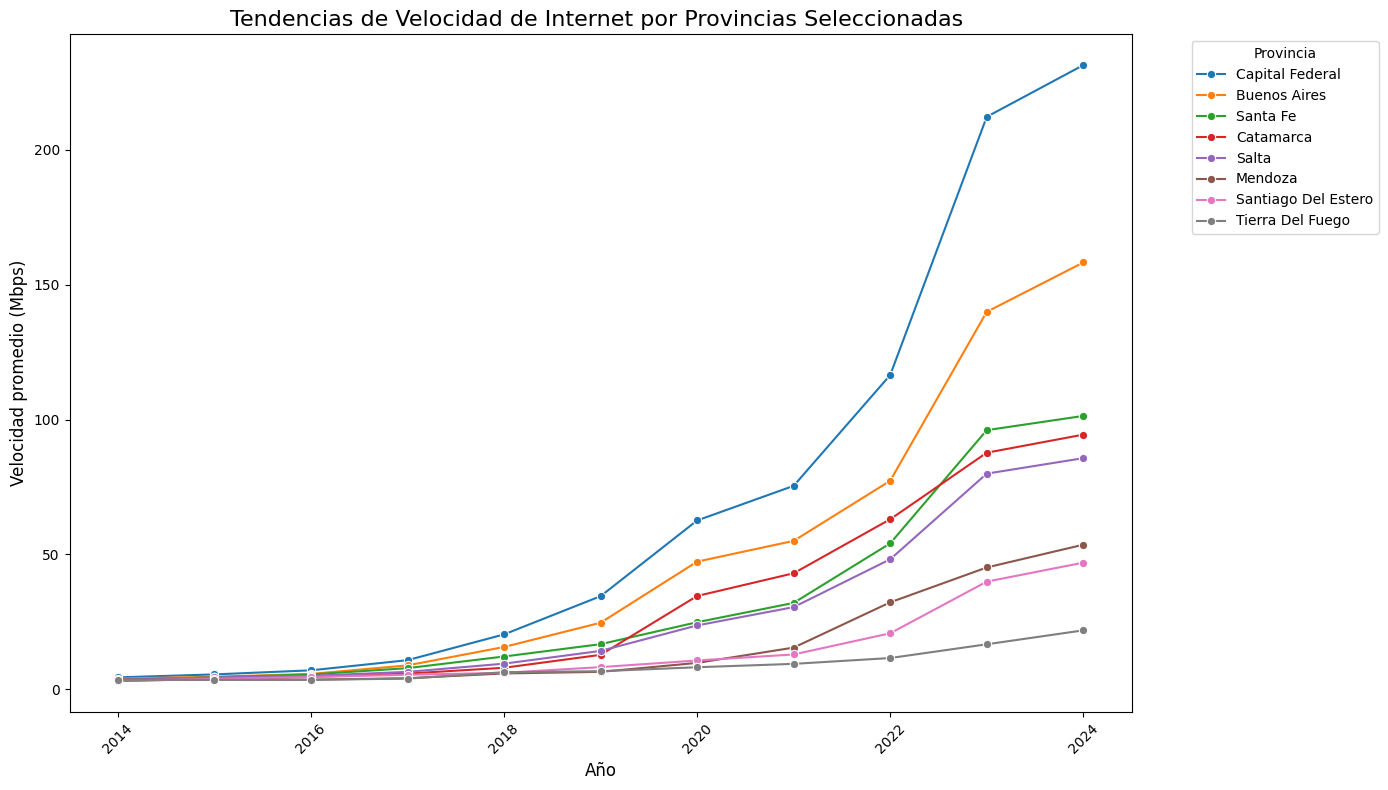

In [ ]:
# Provincias seleccionadas
provincias = ['Capital Federal', 'Buenos Aires', 'Catamarca','Santa Fe', 'Salta', 'Mendoza', 'Santiago Del Estero', 'Tierra Del Fuego' ]

# Agrupar por Provincia y Año para calcular la media de Mbps
velocidad_provincia_temp = velocidad_provincia.groupby([ 'Año','Provincia'])['Mbps (Media de bajada)'].mean().sort_values(ascending=False).reset_index()

velocidad_provincia_selec= velocidad_provincia_temp[velocidad_provincia_temp['Provincia'].isin(provincias)]


# Graficar las tendencias por provincia
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=velocidad_provincia_selec,
    x='Año',
    y='Mbps (Media de bajada)',
    hue='Provincia',  # Colorea líneas por provincia
    marker='o'
)

# Mejorar la legibilidad del gráfico
plt.title('Tendencias de Velocidad de Internet por Provincias Seleccionadas ', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Velocidad promedio (Mbps)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
# Se analiza las diferencias anuales por provincia para identificar cómo la velocidad ha evolucionado en cada provincia a lo largo de los años desde 2014-2024

# Ordenar datos por Provincia y Año
velocidad_ordenada = velocidad_provincia_selec.sort_values(by=['Provincia', 'Año'])

# Calcular la diferencia anual en Mbps para cada provincia
velocidad_ordenada['Diferencia Anual'] = velocidad_ordenada.groupby('Provincia')['Mbps (Media de bajada)'].diff()
velocidad_ordenada = velocidad_ordenada.dropna()
velocidad_ordenada.rename(columns={"Mbps (Media de bajada)": "Velocidad promedio (Mbps)"}, inplace=True)

In [12]:
velocidad_ordenada

,Año,Provincia,Velocidad promedio (Mbps),Diferencia Anual
203,2015,Buenos Aires,4.593012,0.654765
184,2016,Buenos Aires,5.668444,1.075433
143,2017,Buenos Aires,8.818755,3.150310
111,2018,Buenos Aires,15.648091,6.829336
82,2019,Buenos Aires,24.643270,8.995179
...,...,...,...,...
148,2020,Tierra Del Fuego,8.133170,1.472719
141,2021,Tierra Del Fuego,9.385845,1.252675
130,2022,Tierra Del Fuego,11.547500,2.161655
109,2023,Tierra Del Fuego,16.647500,5.100000


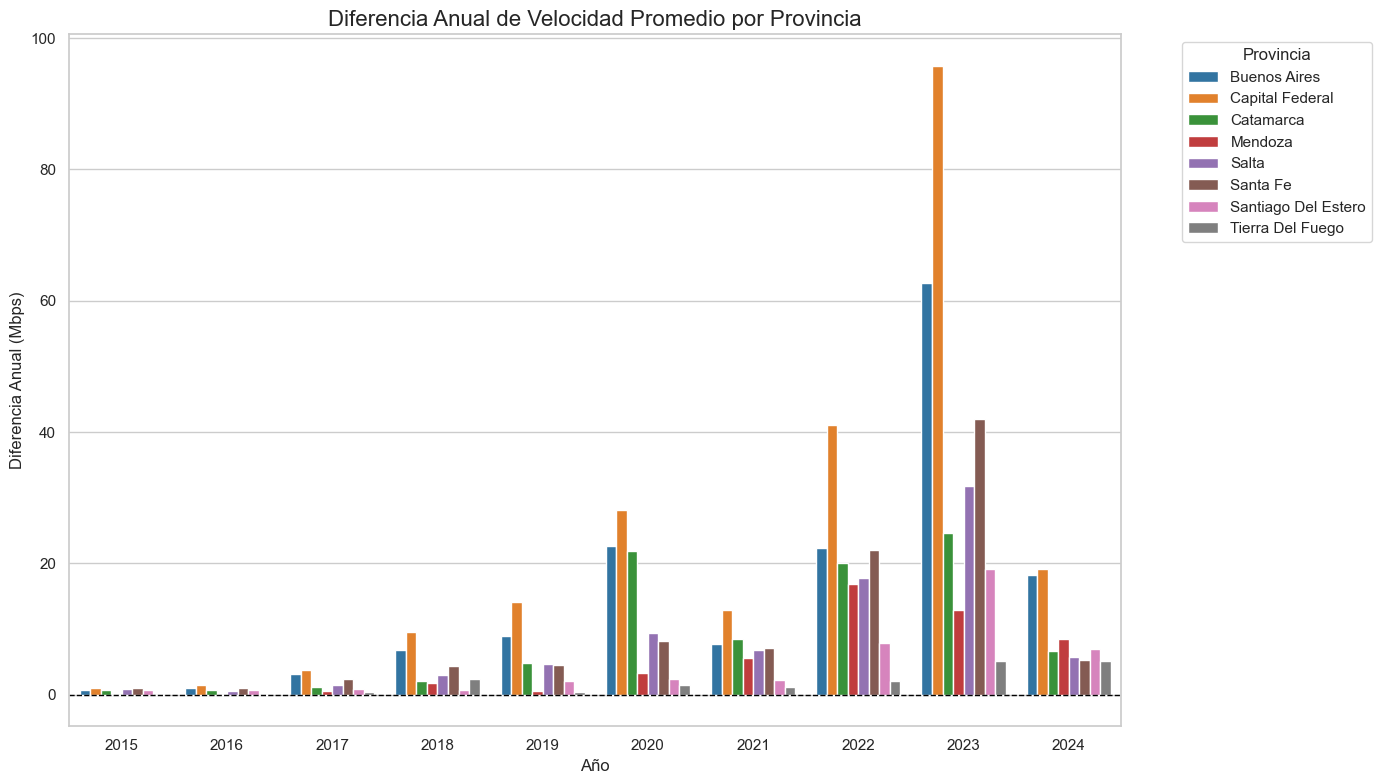

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=velocidad_ordenada,  
    x='Año',
    y='Diferencia Anual',
    hue='Provincia',
    palette='tab10'
)
plt.title('Diferencia Anual de Velocidad Promedio por Provincia', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Diferencia Anual (Mbps)', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Análisis**
1. **Crecimiento de la Velocidad Promedio por Provincia** <p>
Las provincias muestran un crecimiento significativo en la velocidad promedio de internet con el paso de los años, pero el ritmo varía considerablemente según la región.<p>
    Se detalla el crecimiento según Categorías basadas en cuartiles:<p>
    
    Alto:
    - Capital Federal y Buenos Aires: Incremento notable en 2023 (+95.78 Mbps y +62.67 Mbps), posiblemente debido a mejoras en infraestructura.

    Medio-Alto:
     - Catamarca: Mostró un crecimiento continuo entre 2022 y 2023 (+20.03 Mbps, +24.69 Mbps), lo que indica un esfuerzo por mejorar la conectividad en zonas menos desarrolladas.
     - Santa Fe: Experimentaron un crecimiento moderado, con incrementos notables en 2022-2023 (+22.1 Mbps y +41.9 Mbps, respectivamente).

    Medio-Bajo:
     - Salta :  Incremento significativo en 2022 y 2023, de +17.76 Mbps y +31.76 Mbps respectivamente.
     - Mendoza: Incrementos más estables y menores comparados con provincias de mayor categoría. 

    Bajo:
     - Tierra del Fuego y Santiago del Estero: Incrementos pequeños pero constantes. Esto podría deberse a limitaciones geográficas, menor demanda y menor inversión.

2. **Años clave**<p>
   - 2020-2021 (Pandemia del COVID-19):<p>
    Durante la pandemia, se evidenció un aumento en la velocidad en varias provincias, destacando especialmente Capital Federal y Buenos Aires. Esto se debe al aumento del teletrabajo y la educación a distancia, lo que obligó a proveedores a mejorar la infraestructura.

   - 2022-2023:<p>
    Período con las mayores mejoras en provincias como Capital Federal, Santa Fe y Buenos Aires. La reactivación económica post-pandemia impulsó inversiones significativas en redes de alta velocidad.

**Conclusión**
- Tendencia General: Las velocidades promedio han crecido de manera consistente, con un salto marcado durante y después de la pandemia debido a la creciente demanda de conectividad.

- Impacto del COVID-19: La pandemia impulsó mejoras significativas en infraestructura tecnológica en regiones clave, especialmente en áreas urbanas densas como Buenos Aires y Capital Federal.

- Provincias Rezagadas: Zonas como Tierra del Fuego y Santiago del Estero aún requieren mayor inversión para cerrar la brecha digital.

- A Futuro: Invertir en provincias rezagadas podría mejorar la conectividad general.


# Análisis Hoja  **totales_accesos_tecnologia**

Total de conexiones por tipo de tecnología utilizadda ( ADSL, fibra óptica, cable módem, etc)

## Valores nulos, duplicados, outliers

In [ ]:
totales_accesos_tecnologia.isnull().sum() # valores nulos

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [ ]:
(totales_accesos_tecnologia == 0).sum() #valores iguales a 0

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [31]:
totales_accesos_tecnologia.duplicated().sum() #duplicados

0

In [51]:
totales_accesos_tecnologia.head(2)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,733491,5867504,4169958,593197,191957,11556107
1,2024,1,774475,5986957,4015101,598682,257941,11633156


In [33]:
# Descripcion de los datos
totales_accesos_tecnologia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,42.000000,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,42.000000,42.000000,4.200000e+01
mean,2018.761905,2.452381,2.694844e+06,4.433906e+06,1.224694e+06,304293.214286,158186.071429,8.815923e+06
std,3.074756,1.130560,1.094347e+06,1.319783e+06,1.321136e+06,203202.399993,82363.507846,1.733189e+06
min,2014.000000,1.000000,7.334910e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.250000,1.730869e+06,3.146292e+06,1.719410e+05,85390.500000,70430.000000,7.218131e+06
50%,2019.000000,2.000000,3.061623e+06,4.535507e+06,6.989465e+05,292223.000000,185221.000000,8.720658e+06
75%,2021.000000,3.000000,3.713298e+06,5.857192e+06,1.945689e+06,515434.000000,244069.500000,1.038873e+07
max,2024.000000,4.000000,3.803024e+06,6.073426e+06,4.169958e+06,598682.000000,265328.000000,1.163316e+07


In [38]:
#Outlier por Z-score: Detecta valores que se alejan más de 3 desviaciones estándar de la media.
from scipy import stats

z_scores = stats.zscore(totales_accesos_tecnologia.select_dtypes(include=[float, int]))
outliers_zscore = totales_accesos_tecnologia[(abs(z_scores) > 3).any(axis=1)]
print(f"Filas con posibles outliers usando Z-Score:{outliers_zscore}")

Filas con posibles outliers usando Z-Score:Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total]
Index: []


In [15]:
totales_accesos_tecnologia.head(2)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,733491,5867504,4169958,593197,191957,11556107
1,2024,1,774475,5986957,4015101,598682,257941,11633156


## Evolución de las conexiones por tecnología
- Objetivo: Visualizar la evolución de las conexiones por tecnología a lo largo del tiempo
- Uso de líneas temporales para ver la evolucion de las conexiones.

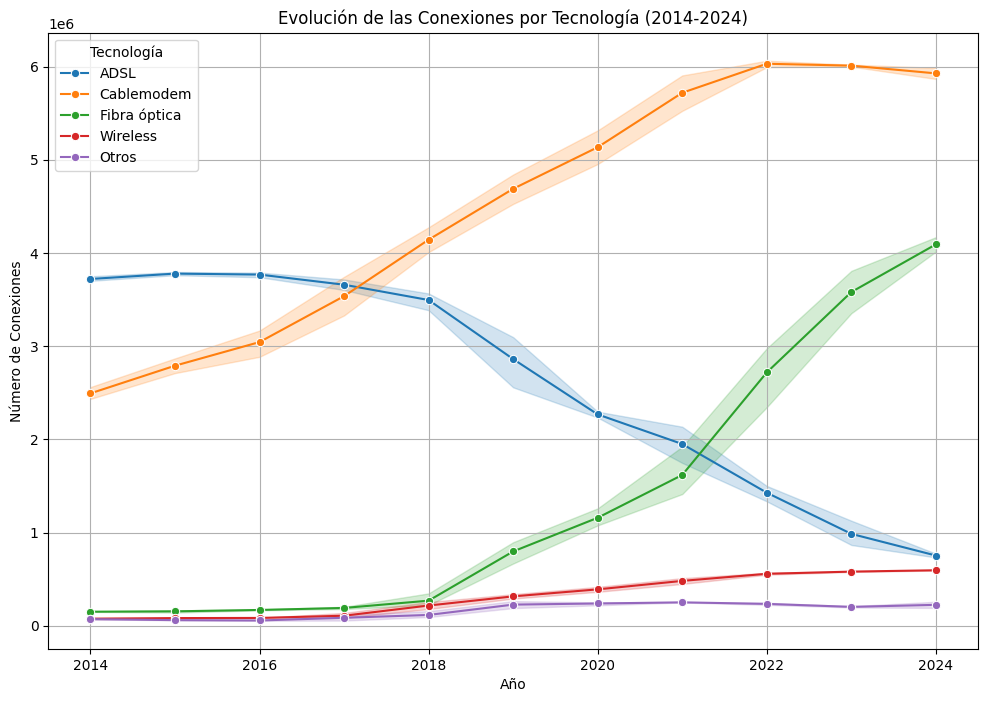

In [52]:
# Evolución de las conexiones por tecnología
plt.figure(figsize=(12, 8))
# Grafica de cada tecnologia
for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    sns.lineplot(x='Año', y=tech, data=totales_accesos_tecnologia, marker='o', label=tech)
# Confirguraciones
plt.title('Evolución de las Conexiones por Tecnología (2014-2024)')
plt.xlabel('Año')
plt.ylabel('Número de Conexiones')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()

Analisis Evolucion de conexiones por tecnologia a nivel nacional:
(Evalúa si hay tecnologías que están creciendo (por ejemplo, Fibra óptica) mientras otras disminuyen (como ADSL).)



## Participación porcentual de tecnología a nivel nacional
- Objetivo: Calcular el porcentaje que representa cada tecnología en el total de conexiones por trimestre o año.
- Uso de grafico de barras al 100%, para visualizar estas proporciones y ver cómo cambian las preferencias tecnológicas.

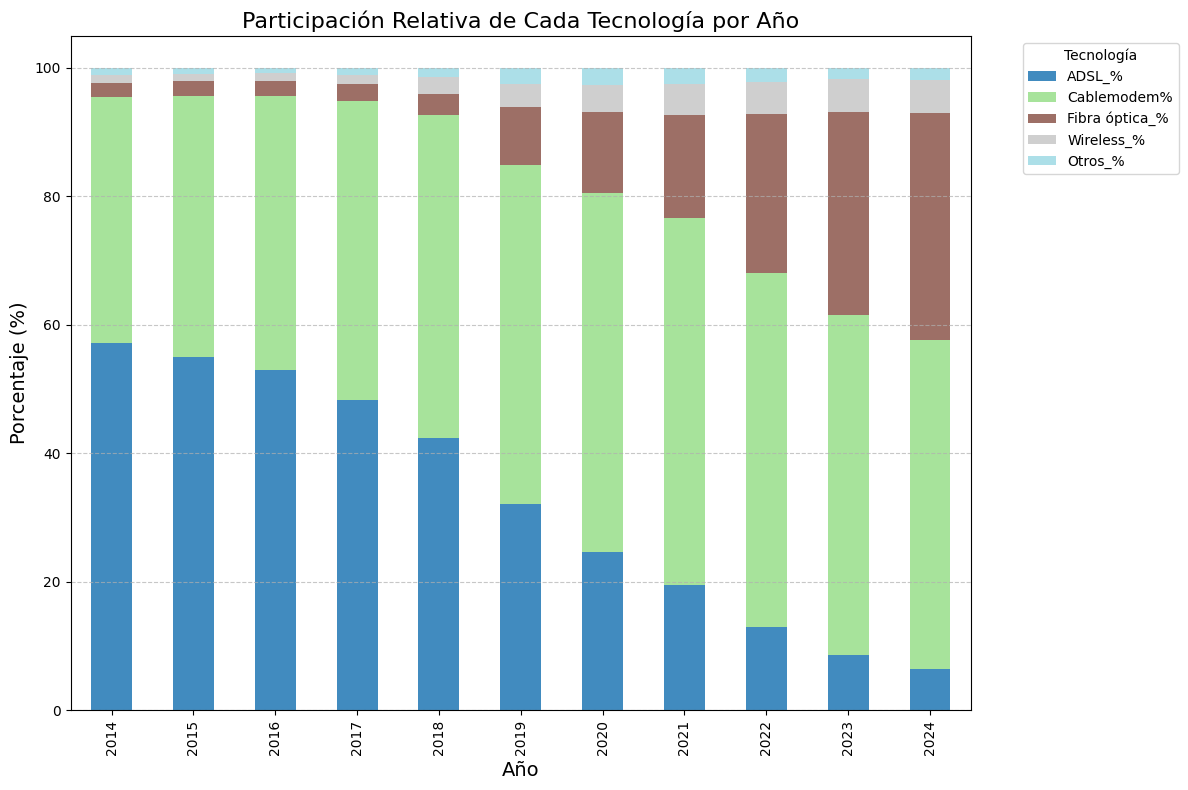

In [53]:
# Calcular la participación relativa por año
total_porcentual = totales_accesos_tecnologia
total_porcentual['ADSL_%'] = (totales_accesos_tecnologia['ADSL'] / totales_accesos_tecnologia['Total']) * 100
total_porcentual['Cablemodem%'] = (totales_accesos_tecnologia['Cablemodem'] / totales_accesos_tecnologia['Total']) * 100
total_porcentual['Fibra óptica_%'] = (totales_accesos_tecnologia['Fibra óptica'] / totales_accesos_tecnologia['Total']) * 100
total_porcentual['Wireless_%'] = (totales_accesos_tecnologia['Wireless'] / totales_accesos_tecnologia['Total']) * 100
total_porcentual['Otros_%'] = (totales_accesos_tecnologia['Otros'] / totales_accesos_tecnologia['Total']) * 100

# Seleccionar columnas de porcentaje para graficar
tech_percentages = total_porcentual[['Año', 'ADSL_%', 'Cablemodem%', 'Fibra óptica_%', 'Wireless_%', 'Otros_%']]

# Agrupar por año y promediar los trimestres
tech_percentages_yearly = tech_percentages.groupby('Año').mean()

# Graficar la evolución de la participación relativa
tech_percentages_yearly.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20', alpha=0.85)

# Personalizar el gráfico
plt.title('Participación Relativa de Cada Tecnología por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

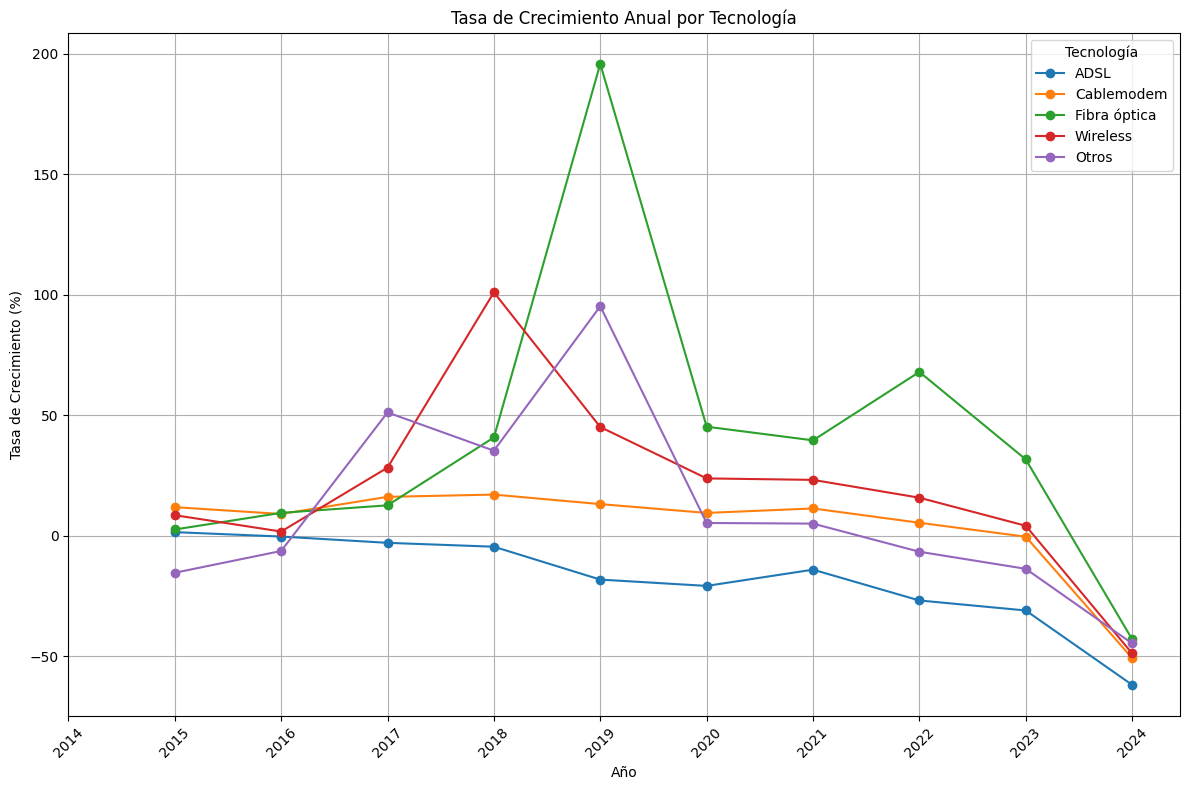

In [ ]:
# prueba

# Agrupar por año y sumar los valores anuales
data_yearly =totales_accesos_tecnologia.groupby('Año').sum(numeric_only=True)

# Calcular la tasa de crecimiento anual para cada tecnología
for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    data_yearly[f'{tech}_growth_y'] = data_yearly[tech].pct_change() * 100

# Visualización de la tasa de crecimiento anual
plt.figure(figsize=(12, 8))
for tech in ['ADSL_growth_y', 'Cablemodem_growth_y', 'Fibra óptica_growth_y', 'Wireless_growth_y', 'Otros_growth_y']:
    plt.plot(data_yearly.index, data_yearly[tech], marker='o', label=tech.replace('_growth_y', ''))

plt.title('Tasa de Crecimiento Anual por Tecnología')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento (%)')
plt.xticks(data_yearly.index, rotation=45)
plt.legend(title='Tecnología')
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis Hoja  **accesos_tecnologia_provincia**

## Valores nulos, duplicados, outliers

In [80]:
# Convertir a numérico, reemplazando valores no convertibles por NaN, y luego a int
accesos_tecnologia_provincia['Año'] = pd.to_numeric(accesos_tecnologia_provincia['Año'], errors='coerce').fillna(0).astype(int)

In [81]:
#Elimina trimestre, agrupo por año y provincia, suma de cantidad de accesos (conexiones)
accesos_tecnologia_provincia= accesos_tecnologia_provincia.groupby(['Año','Provincia'], as_index=False).sum()
accesos_tecnologia_provincia.drop(columns=['Trimestre'], inplace=True)

In [98]:
accesos_tecnologia_provincia.head(5)

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,Buenos Aires,6275077.0,4207132.0,485970.0,71325.0,130890.0,11170394.0
1,2014,Capital Federal,1799146.0,3322198.0,70537.0,7706.0,58891.0,5258478.0
2,2014,Catamarca,98078.0,774.0,65.0,0.0,177.0,99094.0
3,2014,Chaco,214637.0,40621.0,120.0,1.0,237.0,255616.0
4,2014,Chubut,199894.0,2553.0,3505.0,45845.0,26622.0,278419.0


In [ ]:
accesos_tecnologia_provincia.isnull().sum()

Año             0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [84]:
(accesos_tecnologia_provincia == 0).sum()

Año             0
Provincia       0
ADSL            0
Cablemodem      3
Fibra óptica    0
Wireless        6
Otros           0
Total           0
dtype: int64

In [85]:
accesos_tecnologia_provincia.duplicated().sum()

0

In [92]:
accesos_tecnologia_provincia.describe()

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,264.000000,2.640000e+02,2.640000e+02,2.640000e+02,264.000000,264.000000,2.640000e+02
mean,2019.000000,4.307628e+05,6.948234e+05,1.852155e+05,47841.003788,24782.276515,1.383425e+06
std,3.168284,9.253402e+05,1.718079e+06,6.506872e+05,78934.691751,41739.490138,2.995685e+06
min,2014.000000,5.057000e+03,0.000000e+00,1.000000e+00,0.000000,42.000000,5.180500e+04
25%,2016.000000,6.655700e+04,4.434825e+04,1.724250e+03,3881.750000,1589.500000,2.328922e+05
50%,2019.000000,1.596530e+05,1.504435e+05,1.762300e+04,20786.500000,8055.000000,4.280630e+05
75%,2022.000000,3.123930e+05,2.974220e+05,1.149930e+05,54273.750000,29528.000000,7.169710e+05
max,2024.000000,6.336715e+06,1.110938e+07,6.721851e+06,546777.000000,280767.000000,1.968627e+07


In [90]:
#Outlier por Z-score: Detecta valores que se alejan más de 3 desviaciones estándar de la media.
from scipy import stats
 
z_scores = stats.zscore(accesos_tecnologia_provincia.select_dtypes(include=[float, int]))
outliers_zscore = accesos_tecnologia_provincia[(abs(z_scores) > 3).any(axis=1)]
print(f"Filas con posibles outliers usando Z-Score:\n{outliers_zscore}")

Filas con posibles outliers usando Z-Score:
      Año     Provincia       ADSL  Cablemodem  Fibra óptica  Wireless  \
0    2014  Buenos Aires  6275077.0   4207132.0      485970.0   71325.0   
24   2015  Buenos Aires  6336715.0   4645385.0      466696.0   78408.0   
48   2016  Buenos Aires  6300766.0   5277254.0      456511.0   82532.0   
72   2017  Buenos Aires  5466924.0   6290047.0      494072.0  137895.0   
96   2018  Buenos Aires  5643696.0   7480662.0      730038.0  263430.0   
120  2019  Buenos Aires  4586425.0   8437258.0     1813913.0  312790.0   
144  2020  Buenos Aires  2624090.0   9280431.0     2997838.0  364785.0   
168  2021  Buenos Aires  2244988.0  10257877.0     3737407.0  459467.0   
192  2022  Buenos Aires  1408253.0  10964050.0     5576746.0  509124.0   
210  2022      San Luis    27990.0    113153.0        3936.0  294594.0   
216  2023  Buenos Aires  1031216.0  11109381.0     6721851.0  546777.0   
234  2023      San Luis    19294.0    167622.0       77207.0  314299

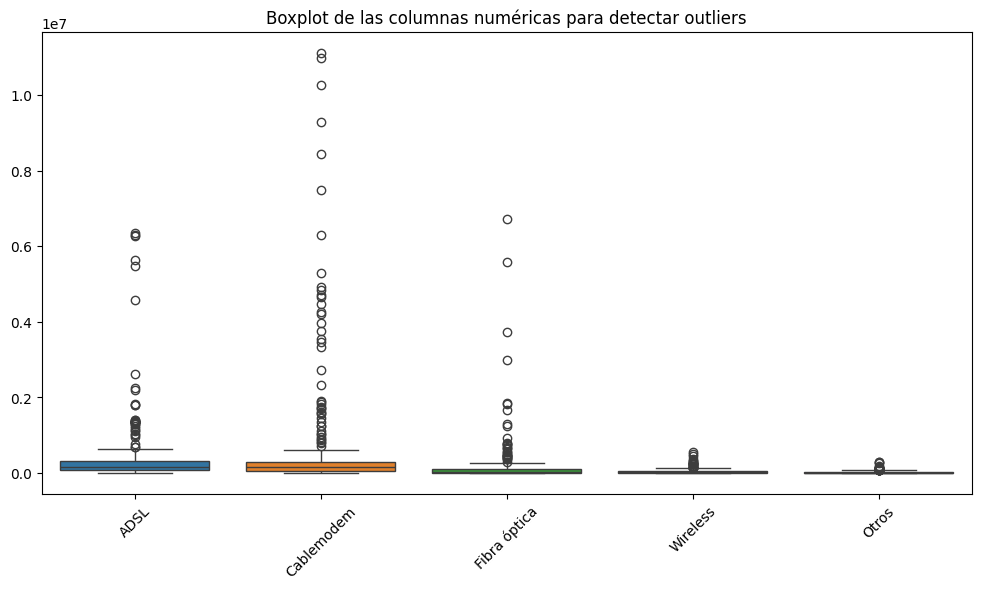

In [89]:
columnas_tecnologias = [ 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
datos_numericos = accesos_tecnologia_provincia[columnas_tecnologias]

# Visualizar los outliers usando un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_numericos)
plt.xticks(rotation=45)
plt.title("Boxplot de las columnas numéricas para detectar outliers")
plt.show()

Análisis
- Al hacer la conversion a int, se rellena los datos nulos con 0. 
- Por la prueba del z-score para identificar outliers y por el uso de boxplot, estos se encuentran presentes principalmente en la provincia de Buenos Aires, con mayor datos atipitocs en el uso de tecnologías Cablemoden, Fibra óptica y ADSL, estos datos se mantendran para posterior análisis y su justificación.

In [ ]:
accesos_tecnologia_provincia.head(10)

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,Buenos Aires,6275077.0,4207132.0,485970.0,71325.0,130890.0,11170394.0
1,2014,Capital Federal,1799146.0,3322198.0,70537.0,7706.0,58891.0,5258478.0
2,2014,Catamarca,98078.0,774.0,65.0,0.0,177.0,99094.0
3,2014,Chaco,214637.0,40621.0,120.0,1.0,237.0,255616.0
4,2014,Chubut,199894.0,2553.0,3505.0,45845.0,26622.0,278419.0
5,2014,Corrientes,213159.0,35669.0,133.0,5242.0,250.0,254453.0
6,2014,Córdoba,1360035.0,941284.0,1561.0,15240.0,1605.0,2319725.0
7,2014,Entre Ríos,437981.0,88552.0,203.0,20063.0,661.0,547460.0
8,2014,Formosa,83934.0,18908.0,1.0,0.0,323.0,103166.0
9,2014,Jujuy,121370.0,16315.0,90.0,114.0,42.0,137931.0


## Analisis temporal
- Objetivo: Visualizar la evolución del total de conexiones por provincias.
- Uso de gráfico: Línea temporal con Conexiones vs Año.

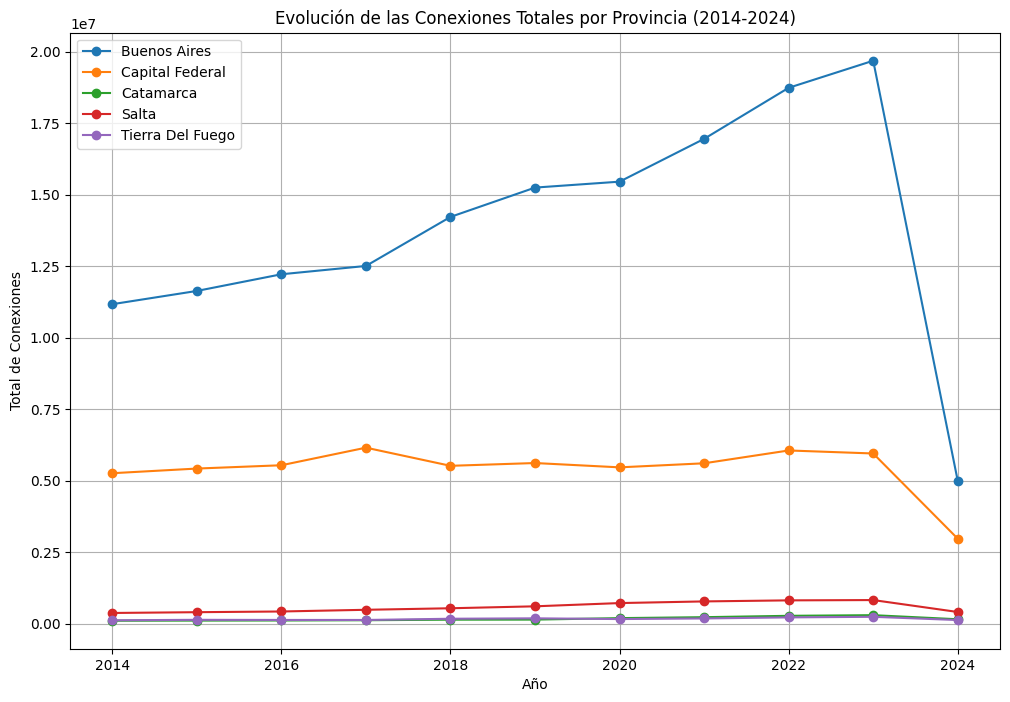

In [106]:
# Seleccionamos algunas provincias para comparación
provincias_selec = ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Salta', 'Tierra Del Fuego']

df_provincia = accesos_tecnologia_provincia[accesos_tecnologia_provincia['Provincia'].isin(provincias_selec) ]

plt.figure(figsize=(12, 8))

for provincia in provincias_selec:
    data_provincia = df_provincia[df_provincia['Provincia'] == provincia]
    plt.plot(data_provincia['Año'], data_provincia['Total'], marker='o', label=provincia)

plt.title('Evolución de las Conexiones Totales por Provincia (2014-2024)')
plt.xlabel('Año')
plt.ylabel('Total de Conexiones')
plt.legend()
plt.grid(True)
plt.show()

**Análsis**
- sdfs
- dfsdfs
- sdfsd

In [107]:
data_provincia

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
22,2014,Tierra Del Fuego,87024.0,12978.0,2601.0,4.0,11422.0,114029.0
46,2015,Tierra Del Fuego,90199.0,28237.0,2652.0,4.0,9633.0,130725.0
70,2016,Tierra Del Fuego,90544.0,23722.0,2660.0,4.0,9397.0,126327.0
94,2017,Tierra Del Fuego,86231.0,27728.0,2482.0,4.0,8989.0,125434.0
118,2018,Tierra Del Fuego,77898.0,78417.0,4187.0,3.0,7640.0,168145.0
142,2019,Tierra Del Fuego,72630.0,102556.0,2925.0,0.0,4769.0,182880.0
166,2020,Tierra Del Fuego,51415.0,104587.0,6.0,0.0,1244.0,157252.0
190,2021,Tierra Del Fuego,51876.0,124857.0,444.0,154.0,1364.0,178695.0
214,2022,Tierra Del Fuego,51293.0,159793.0,1627.0,531.0,2293.0,215537.0
238,2023,Tierra Del Fuego,43860.0,181644.0,8294.0,628.0,1652.0,236078.0


## Distribución porcentual
- Objetivo: Visualizar la distribución porcentual de cada tecnología por povincias.
- Uso de grafico de barras y garfico de tortas.

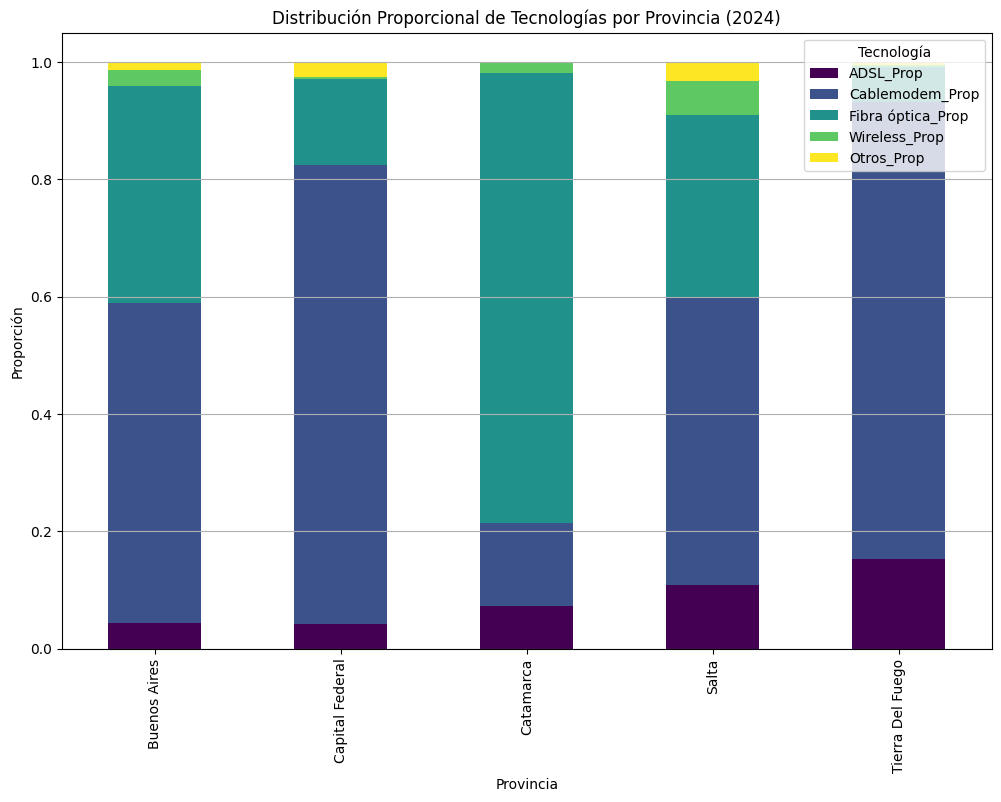

In [108]:
df_provincia_2024 = df_provincia[df_provincia['Año'] == 2024].copy()
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

for tecnologia in tecnologias:
    df_provincia_2024[tecnologia + '_Prop'] = df_provincia_2024[tecnologia] / df_provincia_2024['Total']

df_provincia_2024.set_index('Provincia')[['ADSL_Prop', 'Cablemodem_Prop', 'Fibra óptica_Prop', 'Wireless_Prop', 'Otros_Prop']].plot(
    kind='bar', stacked=True, figsize=(12, 8), colormap='viridis'
)

plt.title('Distribución Proporcional de Tecnologías por Provincia (2024)')
plt.xlabel('Provincia')
plt.ylabel('Proporción')
plt.legend(loc='upper right', title='Tecnología')
plt.grid(axis='y')
plt.show()


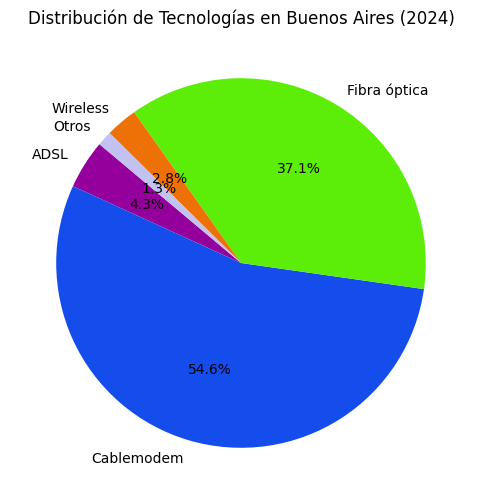

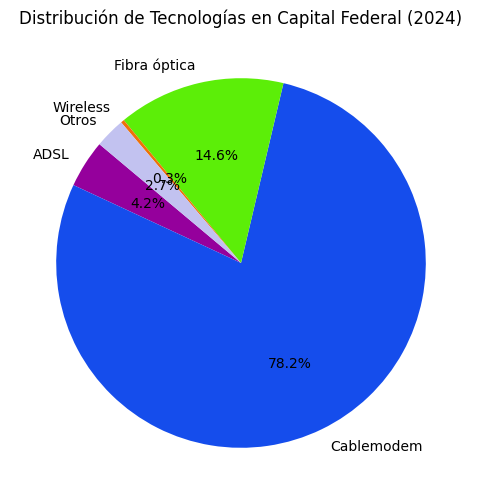

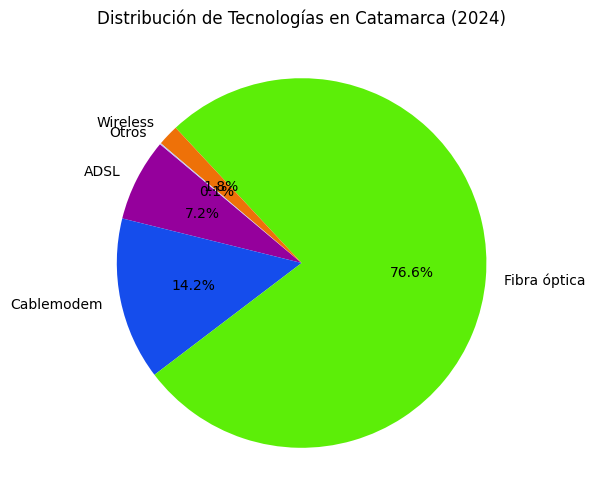

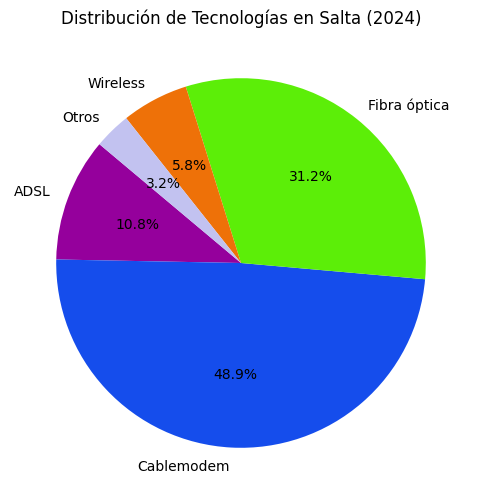

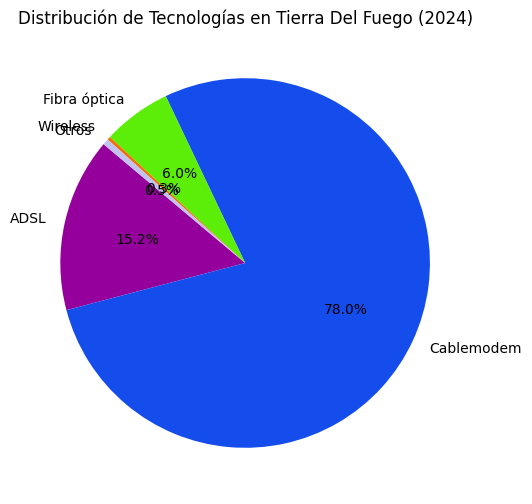

In [119]:
# Graficar un gráfico de torta para cada provincia
for _, row in df_provincia_2024.iterrows():
    plt.figure(figsize=(6, 6))
    plt.pie(
        row[tecnologias], 
        labels=tecnologias, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors= ['#95009c', '#154dec', '#5cee08', '#ee7108', '#C2C2F0'] 
    )
    plt.title(f'Distribución de Tecnologías en {row["Provincia"]} (2024)')
    plt.show()


# Análisis Hoja **p_totales_provincia**

## Valores nulos, duplicados, outliers

In [5]:
p_totales_provincia.isnull().sum() # valores nulos

Año                                         0
Trimestre                                   0
Provincia                                   0
Accesos por cada 100 hogares (Provincia)    0
Accesos por cada 100 hab (Provincia)        0
Accesos por cada 100 hogares (Total)        0
Accesos por cada 100 hab (Total)            0
dtype: int64

In [6]:
(p_totales_provincia == 0).sum() #valores iguales a 0


Año                                         0
Trimestre                                   0
Provincia                                   0
Accesos por cada 100 hogares (Provincia)    0
Accesos por cada 100 hab (Provincia)        0
Accesos por cada 100 hogares (Total)        0
Accesos por cada 100 hab (Total)            0
dtype: int64

In [7]:
p_totales_provincia.duplicated().sum() #duplicados

0

## Distribución de Accesos
- Objetivo: Graficar la distribución de accesos para cada 100 hogares y habitantes (Porvincia, Totales). Con el fin de entender cómo está distribuida la penetración de internet en los hogares y en la población.
- Uso de gráficos: histogramas

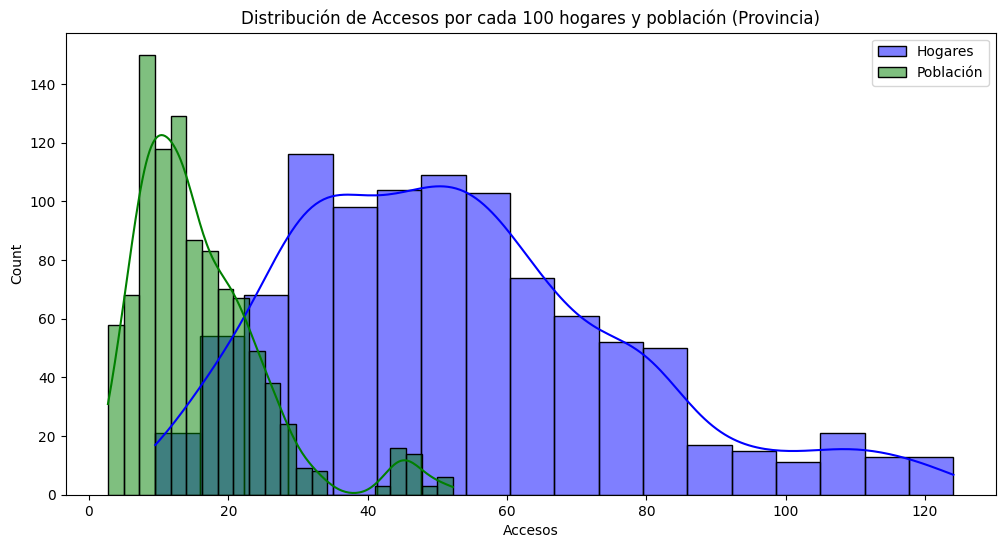

In [9]:
# Histograma para la penetración en hogares y población por provincia
plt.figure(figsize=(12, 6))
sns.histplot(p_totales_provincia['Accesos por cada 100 hogares (Provincia)'], kde=True, color='blue', label='Hogares')
sns.histplot(p_totales_provincia['Accesos por cada 100 hab (Provincia)'], kde=True, color='green', label='Población')
plt.title('Distribución de Accesos por cada 100 hogares y población (Provincia)')
plt.xlabel('Accesos')
plt.legend()
plt.show()

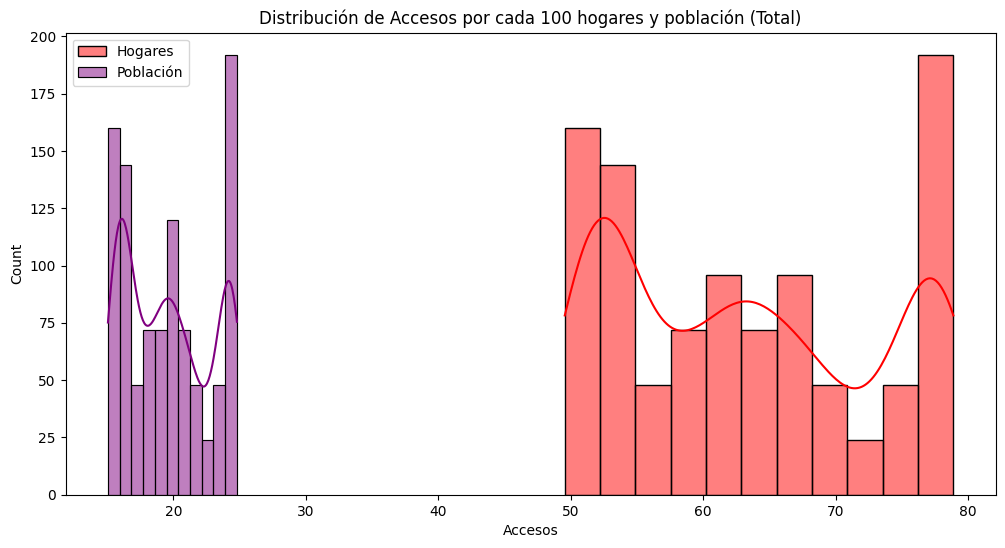

In [8]:
# Histograma para la penetración en hogares y población por provincia
plt.figure(figsize=(12, 6))
sns.histplot(p_totales_provincia['Accesos por cada 100 hogares (Total)'], kde=True, color='red', label='Hogares')
sns.histplot(p_totales_provincia['Accesos por cada 100 hab (Total)'], kde=True, color='purple', label='Población')
plt.title('Distribución de Accesos por cada 100 hogares y población (Total)')
plt.xlabel('Accesos')
plt.legend()
plt.show()

**Análisis**


## Analisis temporal
- Objetivo: Graficar la evolución anual de la cantidad de accesos por cada 100 hogares/habitantes para ciertas provincias.
- Uso de gráficos: grafico de lineas, Accesos vs Año.

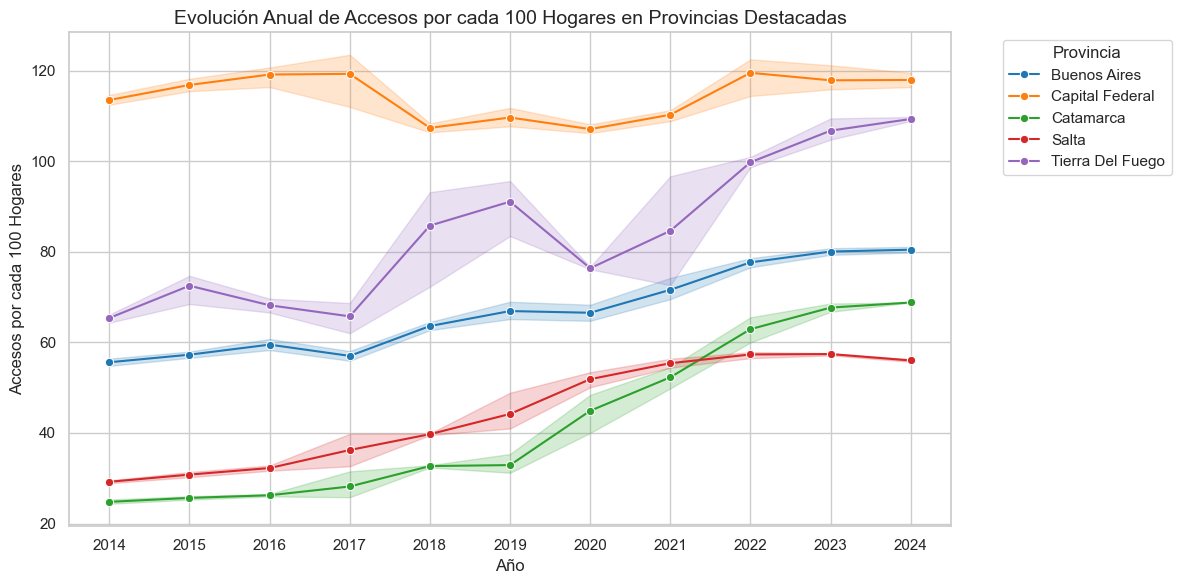

In [ ]:
df_p_totales_provincia = p_totales_provincia[p_totales_provincia['Provincia'].isin(provincias_selec) ]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Gráfico de línea con Seaborn
sns.lineplot(
    data=df_p_totales_provincia, 
    x='Año', 
    y='Accesos por cada 100 hogares (Provincia)', 
    hue='Provincia', 
    marker='o', 
    palette='tab10'
)

# Configuración adicional del gráfico
plt.title('Tendencia Anual de Accesos por cada 100 Hogares en Provincias Seleccionadas', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos por cada 100 Hogares', fontsize=12)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_p_totales_provincia['Año'].unique())  # Mostrar solo los años presentes en los datos
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

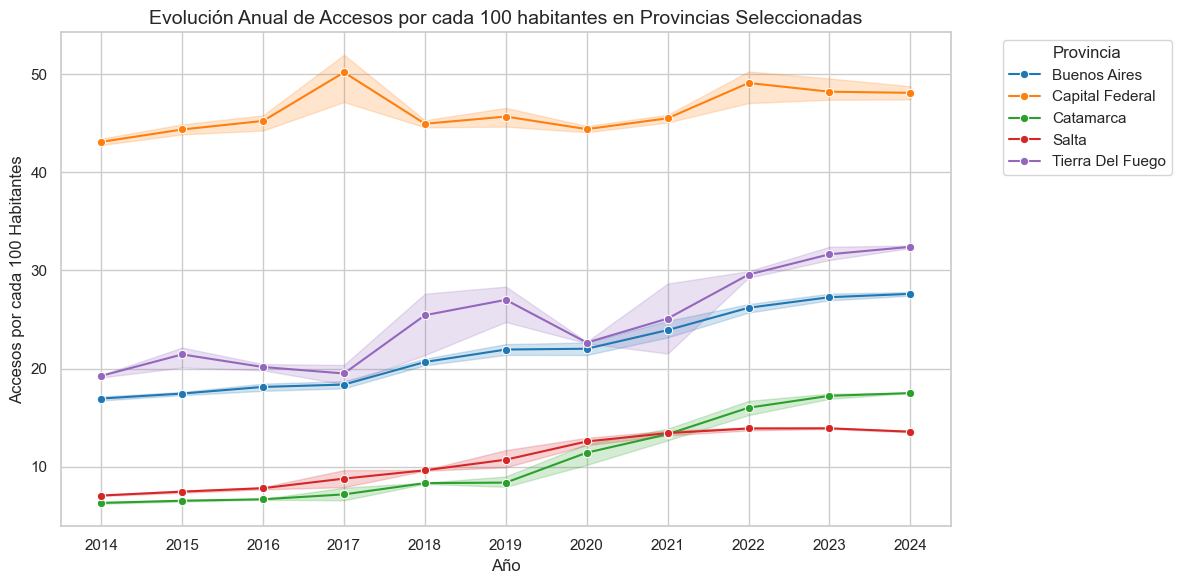

In [ ]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Gráfico de línea con Seaborn
sns.lineplot(
    data=df_p_totales_provincia, 
    x='Año', 
    y='Accesos por cada 100 hab (Provincia)', 
    hue='Provincia', 
    marker='o', 
    palette='tab10'
)

# Configuración adicional del gráfico
plt.title('Tendencia Anual de Accesos por cada 100 habitantes en Provincias Seleccionadas', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos por cada 100 Habitantes', fontsize=12)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_p_totales_provincia['Año'].unique())  # Mostrar solo los años presentes en los datos
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Análisis**



# Análisis Hoja **ingresos**

## Valores nulos,

In [174]:
ingresos.head(10)

,Año,Trimestre,Ingresos (dolares)
0,2024,2,442916.23
1,2024,1,346891.38
2,2023,4,167710.77
3,2023,3,133372.81
4,2023,2,118296.40
5,2023,1,104343.26
6,2022,4,72588.37
7,2022,3,64214.96
8,2022,2,60540.34
9,2022,1,55329.75


In [175]:
ingresos.isnull().sum()

Año                   0
Trimestre             0
Ingresos (dolares)    0
dtype: int64

In [176]:
(ingresos == 0).sum()


Año                   0
Trimestre             0
Ingresos (dolares)    0
dtype: int64

In [177]:
ingresos.duplicated().sum()

0

In [178]:
ingresos.describe()

,Año,Trimestre,Ingresos (dolares)
count,42.000000,42.000000,42.000000
mean,2018.761905,2.452381,50116.513333
std,3.074756,1.130560,87276.284368
min,2014.000000,1.000000,2990.020000
25%,2016.000000,1.250000,7069.440000
50%,2019.000000,2.000000,20516.215000
75%,2021.000000,3.000000,44940.600000
max,2024.000000,4.000000,442916.230000


## Evolución Anual de Ingresos
- Objetivo: Graficar la evolución de los ingresos(dolares) anuales desde 2014 hasta 2024
- Uso de gráficos: grafico de barras.

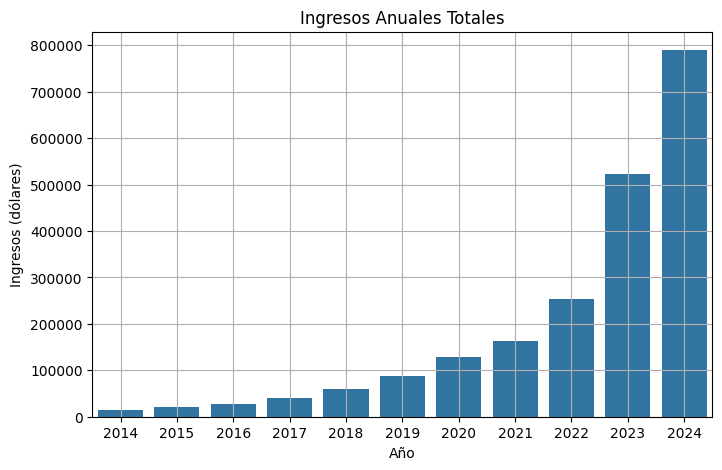

In [10]:
# Agrupar por Año y sumar los ingresos
ingresos_anuales = ingresos.groupby('Año')['Ingresos (dolares)'].sum().reset_index()

# Gráfico de barras para los ingresos anuales
plt.figure(figsize=(8, 5))
sns.barplot(data=ingresos_anuales, x='Año', y='Ingresos (dolares)')
plt.title('Ingresos Anuales Totales')
plt.xlabel('Año')
plt.ylabel('Ingresos (dólares)')
plt.grid(True)
plt.show()

## Crecimiento Anual
- Objetivo: calculo de la tasa de crecimiento, con el fin de medir el crecimiento o decrecimiento porcentual de los ingresos año a año.
- Uso de gráficos: grafico de líneas.

In [180]:
# Agrupar por Año y sumar los ingresos
ingresos_anuales = ingresos.groupby('Año')['Ingresos (dolares)'].sum().reset_index()

# Calcular el crecimiento porcentual interanual
ingresos_anuales['Crecimiento Anual (%)'] = ingresos_anuales['Ingresos (dolares)'].pct_change() * 100
print(ingresos_anuales)


     Año  Ingresos (dolares)  Crecimiento Anual (%)
0   2014            13711.32                    NaN
1   2015            20149.03              46.951789
2   2016            26921.25              33.610650
3   2017            39751.31              47.657742
4   2018            59658.67              50.079758
5   2019            86946.07              45.739203
6   2020           127841.01              47.034834
7   2021           163710.63              28.057992
8   2022           252673.42              54.341487
9   2023           523723.24             107.272787
10  2024           789807.61              50.806294


In [181]:
ingresos.head(10)

,Año,Trimestre,Ingresos (dolares)
0,2024,2,442916.23
1,2024,1,346891.38
2,2023,4,167710.77
3,2023,3,133372.81
4,2023,2,118296.40
5,2023,1,104343.26
6,2022,4,72588.37
7,2022,3,64214.96
8,2022,2,60540.34
9,2022,1,55329.75


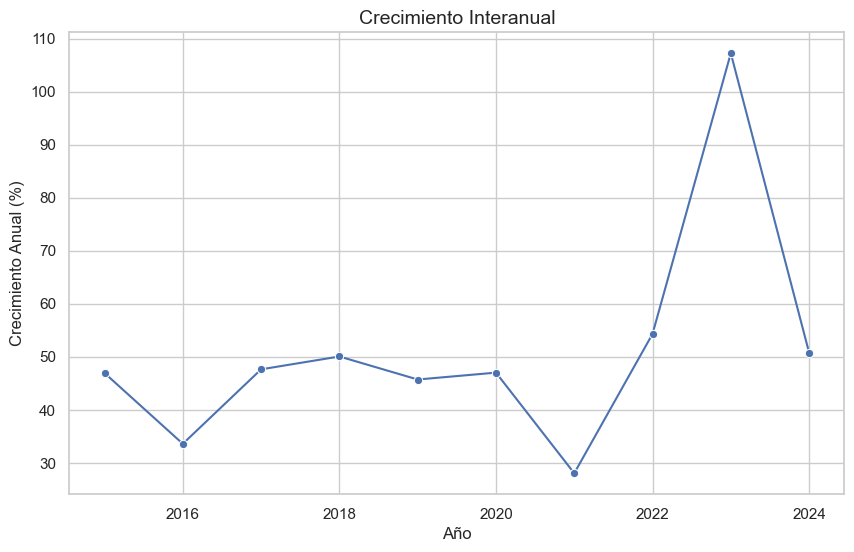

In [185]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=ingresos_anuales, x='Año', y='Crecimiento Anual (%)', marker='o', ax=ax1)
ax1.set_title('Crecimiento Interanual', fontsize=14)
ax1.set_xlabel('Año', fontsize=12)
ax1.set_ylabel('Crecimiento Anual (%)', fontsize=12)
ax1.grid(True, axis='y')

plt.show()

**Análisis**

# KPIS

## 1. KPI_1: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. 
- Fórmula: KPI= ((Nuevoacceso- AccesoActual ) / AccesoActual)*100
Donde:

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.
Esta fórmula te ayudará a calcular el KPI para medir el aumento en el acceso a Internet por cada 100 hogares en cada provincia.

- Dataset a utilizar: p_totales_provincia

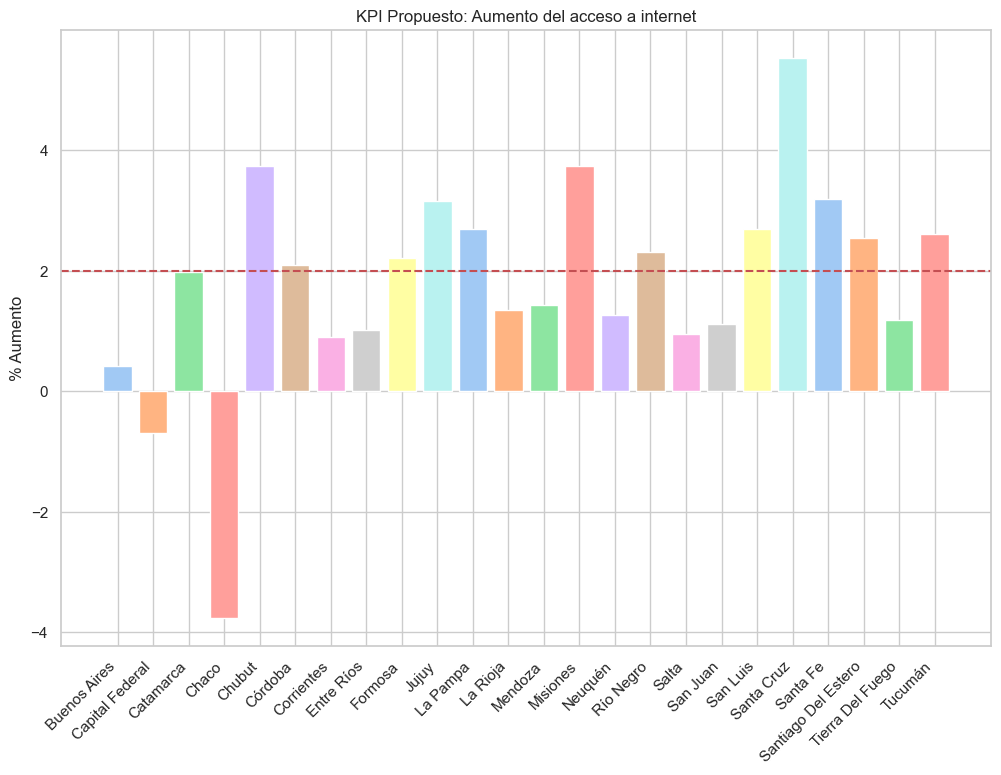

In [209]:
df_p_totales_kpi = p_totales_provincia
# Filtro de datos necesarios para el KPI propuesto
df_actual = df_p_totales_kpi[(df_p_totales_kpi['Año'] == 2024) & (df_p_totales_kpi['Trimestre'] == 2)]
df_anterior = df_p_totales_kpi[(df_p_totales_kpi['Año'] == 2024) & (df_p_totales_kpi['Trimestre'] == 1)]

# Cálculo del KPI propuesto
df_kpi = df_actual.copy()
df_kpi['Acceso Actual'] = df_anterior['Accesos por cada 100 hogares (Provincia)'].values
df_kpi['Nuevo Acceso'] = df_kpi['Accesos por cada 100 hogares (Provincia)'] * 1.02
df_kpi['KPI Propuesto (%)'] = ((df_kpi['Nuevo Acceso'] - df_kpi['Acceso Actual']) / df_kpi['Acceso Actual']) * 100

# Gráfico de KPIs
plt.figure(figsize=(12, 8))

# Subplot 1: KPI Propuesto
# plt.subplot(3, 1, 1)
plt.bar(df_kpi['Provincia'], df_kpi['KPI Propuesto (%)'], color=sns.color_palette('pastel', len(df_kpi)))
plt.title('KPI Propuesto: Aumento del acceso a internet')
plt.axhline(y=2, color='r', linestyle='--', label='2%')
plt.xticks(rotation=45, ha='right')  # Inclinar 45 grados y alinear a la derecha
plt.ylabel('% Aumento')
plt.grid(True)

**Análisis**
- awsdnawd
- dasdsa
- 

## 2. KPI_2: Aumentar velocidad para al menos 2 provincias rezagadas en +10 Mbps, rango: año-trimestre (2023-1 a 2024-1)
- Objetivo: Medir el incremento de velocidad para provincias rezagadas. Para evaluar la mejorar la calidad del acceso a Internet en regiones con velocidades más bajas.
- Fórmula: KPI_Velocidad= (VelocidadPromedioActual(2024-1) - VelocidadPromedioAnterior(2023-1) )*100/VelocidadPromedioAnterior(2023-1)
- Dataset: velocidad_provincia
- Provincias rezagadas= ['Santiago Del Estero','La Pampa','San Juan','Santa Cruz','Tierra Del Fuego']

In [198]:
provincias_rezagadas = ['Santiago Del Estero','La Pampa','San Juan','Santa Cruz','Tierra Del Fuego']

# Provincias seleccionadas
df_velocidad_provincias_kpi = velocidad_provincia[velocidad_provincia['Provincia'].isin(provincias_rezagadas) ]

# Filtro de datos necesarios para el KPI propuesto
df_actual = df_velocidad_provincias_kpi[(df_velocidad_provincias_kpi['Año'] == 2024) & (df_velocidad_provincias_kpi['Trimestre'] == 1)]
df_anterior = df_velocidad_provincias_kpi[(df_velocidad_provincias_kpi['Año'] == 2023) & (df_velocidad_provincias_kpi['Trimestre'] == 1)]

In [201]:
# Paso 1: Calcular el promedio de velocidad por provincia para los dos periodos
promedio_actual = df_actual.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()
promedio_actual.rename(columns={'Mbps (Media de bajada)': 'VelocidadPromedioActual'}, inplace=True)

promedio_anterior = df_anterior.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()
promedio_anterior.rename(columns={'Mbps (Media de bajada)': 'VelocidadPromedioAnterior'}, inplace=True)

# Paso 2: Unir ambos dataframes por 'Provincia' para facilitar el cálculo del KPI
df_kpi = promedio_actual.merge(promedio_anterior, on='Provincia')

# Paso 3: Calcular el KPI según la fórmula proporcionada
df_kpi['KPI_Velocidad'] = ((df_kpi['VelocidadPromedioActual'] - df_kpi['VelocidadPromedioAnterior']) * 100) / df_kpi['VelocidadPromedioAnterior']

# Paso 4: Filtrar las provincias que han incrementado su velocidad en al menos 10 Mbps
df_kpi['Incremento_Velocidad'] = df_kpi['VelocidadPromedioActual'] - df_kpi['VelocidadPromedioAnterior']
provincias_mejoradas = df_kpi[df_kpi['Incremento_Velocidad'] >= 10]


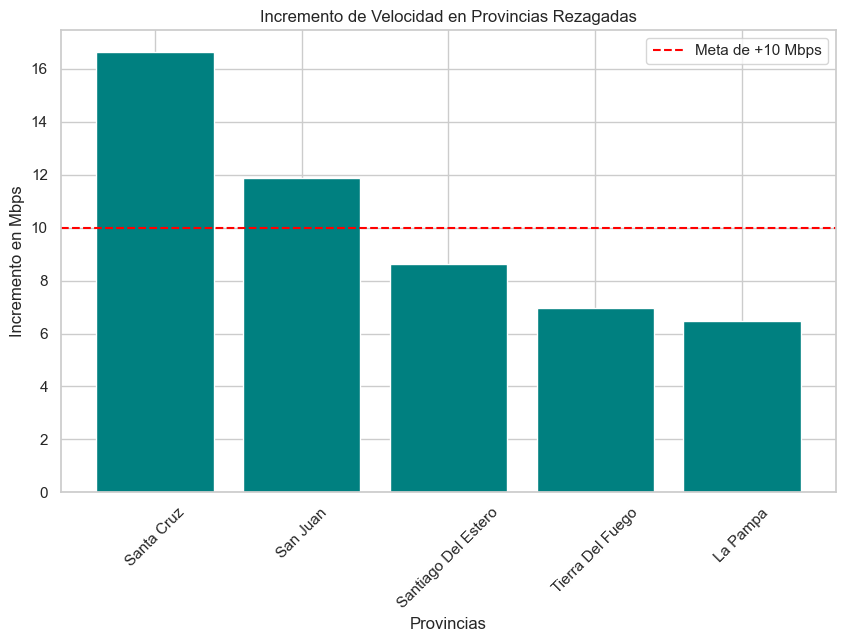

In [202]:
df_kpi_sorted = df_kpi.sort_values('Incremento_Velocidad', ascending=False)

# Paso 2: Graficar el incremento de velocidad
plt.figure(figsize=(10, 6))
plt.bar(df_kpi_sorted['Provincia'], df_kpi_sorted['Incremento_Velocidad'], color='teal')
plt.axhline(y=10, color='red', linestyle='--', label='Meta de +10 Mbps')
plt.title('Incremento de Velocidad en Provincias Rezagadas')
plt.ylabel('Incremento en Mbps')
plt.xlabel('Provincias')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [206]:
p_totales_provincia.head(10)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares (Provincia),Accesos por cada 100 hab (Provincia),Accesos por cada 100 hogares (Total),Accesos por cada 100 hab (Total)
0,2024,2,Buenos Aires,79.84,27.43,78.13,24.57
1,2024,2,Capital Federal,116.37,47.44,78.13,24.57
2,2024,2,Catamarca,68.81,17.50,78.13,24.57
3,2024,2,Chaco,44.06,11.78,78.13,24.57
4,2024,2,Chubut,86.33,26.46,78.13,24.57
5,2024,2,Córdoba,90.79,27.79,78.13,24.57
6,2024,2,Corrientes,51.38,13.53,78.13,24.57
7,2024,2,Entre Ríos,68.64,20.52,78.13,24.57
8,2024,2,Formosa,39.69,10.10,78.13,24.57
9,2024,2,Jujuy,58.30,14.91,78.13,24.57


## 3. KPI_3: Aumento de conexiones en un 2% a nivel nacional por cada 100 hab, rango: año-trimestre (2023-1 a 2024-1)
- Objetivo: medir el incremento en el acceso a Internet por cada 100 habitantes en un periodo específico, para evaluar la mejora en la penetración de Internet a nivel nacional.
- Fórmula: ((AccesosActuales(2024-1) - AccesosAnterior(2023-1)) / AccesosAnterior(2023-1)) * 100
- Dataset a utilizar: p_totales_provincia

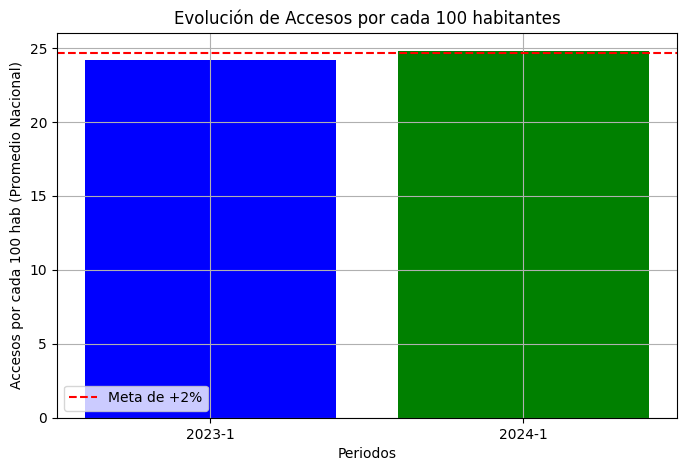

In [4]:
df_p_totales_kpi3 = p_totales_provincia
# Filtro de datos necesarios para el KPI propuesto
df_actual = df_p_totales_kpi3[(df_p_totales_kpi3['Año'] == 2024) & (df_p_totales_kpi3['Trimestre'] == 1)]
df_anterior = df_p_totales_kpi3[(df_p_totales_kpi3['Año'] == 2023) & (df_p_totales_kpi3['Trimestre'] == 1)]

# Paso 2: Calcular el promedio nacional de accesos por cada 100 habitantes
promedio_actual = df_actual['Accesos por cada 100 hab (Total)'].mean()
promedio_anterior = df_anterior['Accesos por cada 100 hab (Total)'].mean()

# Paso 3: Calcular el KPI
kpi_conexiones = ((promedio_actual - promedio_anterior) / promedio_anterior) * 100

# Paso 5: Graficar los resultados
periodos = ['2023-1', '2024-1']
promedios = [promedio_anterior, promedio_actual]

plt.figure(figsize=(8, 5))
plt.bar(periodos, promedios, color=['blue', 'green'])
plt.axhline(y=promedio_anterior * 1.02, color='red', linestyle='--', label='Meta de +2%')
plt.title('Evolución de Accesos por cada 100 habitantes')
plt.ylabel('Accesos por cada 100 hab (Promedio Nacional)')
plt.xlabel('Periodos')
plt.legend()
plt.grid(True)
plt.show()
